# MLP
Mean RCI over 14 cell lines.

This notebook uses
lncRNA, canonical, yes middle-exclusion train, yes middle-exclusion test, -1 threshold, learning module, cross-validation.

In [1]:
SEED = 43
import tensorflow as tf
tf.random.set_seed(SEED) 
tf.keras.backend.set_floatx('float32')
import numpy as np
np.random.seed(SEED) 
from datetime import datetime
print(datetime.now())

2023-04-29 17:15:07.749249


In [2]:
import sys
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found')
else:
    print('Found GPU at: {}'.format(device_name))

try:
    from google.colab import drive
    IN_COLAB = True
    print('Running on CoLab')
    PATH='/content/drive/'
    drive.mount(PATH)
    DATA_DIR=PATH+'My Drive/data/Localization/TrainTest/TrainTest_ver43/'  # must end in "/"
    MODEL_DIR=PATH+'My Drive/data/Localization/Models/'  # must end in "/"
    sys.path.append('/content/drive/My Drive/Colab Notebooks')
except:
    IN_COLAB = False
    DATA_DIR="/"
    MODEL_DIR="/"
print(DATA_DIR)
SAVE_MODEL_FILENAME = None # 'MLP'
SAVE_DESCRIM_FILENAME = None # 'GMM'
LOAD_MODEL_FILENAME = None # 'MLP.0.0.model'
LOAD_DESCRIM_FILENAME = None # 'GMM.0.0.pickle'

GPU device not found
Running on CoLab
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/


In [3]:
from platform import python_version
print('Python',python_version())
import pandas as pd
import scipy.stats as ss
import pickle
import time # sleep function
from os.path import isfile
from matplotlib import pyplot as plt 
import sklearn   # pip install --upgrade scikit-learn
print('sklearn',sklearn.__version__)

from learning import DataLoader, CrossValidator, Separator, ModelBuilder

K=5
ALPHABET=4**K + 1
EPOCHS=300 
EMBED_DIMEN = 4 # arbitrary hyperparameter
RCI_THRESHOLD_MECHANISM = 'ZERO'   # 'RCI_GMM' 'ZERO' 'THE_MEAN'
RCI_THRESHOLD_VALUE = -1  # use -1 for lncRNA, use 0 for mRNA
BREAK = False   # optionally break after first fold
FILTER_TRAIN        = True
FILTER_TAILS_TRAIN  = False
FILTER_MIDDLE_TRAIN = True
FILTER_TEST         = False
FILTER_TAILS_TEST   = False
FILTER_MIDDLE_TEST  = False
MIDDLE_LOW          = -2   # -2 for lncRNA, -1 for mRNA
MIDDLE_HIGH         = 0    #  0 for lncRNA, +1 for mRNA

REPEATS = 2
FOLDS = 5

Python 3.10.11
sklearn 1.2.2


In [4]:
RCI_FILE_TRAIN = 'train.lncRNA_RCI.all_cell_lines.csv'
RCI_FILE_TEST  = None # 'test.lncRNA_RCI.all_cell_lines.csv'

SEQ_FILE_TRAIN = 'train.canon_lncRNA_transcripts.csv'
SEQ_FILE_TEST  = None # 'test.canon_lncRNA_transcripts.csv'

In [5]:
def get_ordered_list():
    ordered_list = \
    ['A549','H1.hESC','HeLa.S3','HepG2','HT1080',\
      'HUVEC','MCF.7','NCI.H460','NHEK','SK.MEL.5',\
      'SK.N.DZ','SK.N.SH','GM12878','K562','IMR.90']
    return ordered_list
all_cell_lines = get_ordered_list()
EXCLUSIONS = [1]  # H1.hESC   
print('Exclusions',EXCLUSIONS)

Exclusions [1]


In [6]:
from tensorflow import keras
from keras import models
import pickle

def save_model(model, discriminator, filename1, filename2):
    filepath = MODEL_DIR + filename1
    model.save(filepath)
    print('Saved model 1 to',filepath)
    filepath = MODEL_DIR + filename2
    pickle.dump(discriminator, open(filepath, 'wb'))
    print('Saved model 2 to',filepath)

def load_model(filename1, filename2):
    filepath = MODEL_DIR + filename1
    model = keras.models.load_model(filepath)
    print('Loaded model 1 from',filepath)
    filepath = MODEL_DIR + filename2
    discriminator = pickle.load(open(filepath, 'rb'))        
    print('Loaded model 2 from',filepath)
    return model, discriminator
        

2023-04-29 17:15:10.333142
Load RCI from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.lncRNA_RCI.all_cell_lines.csv
Number of RCI values loaded 4372
Num RCI: 4372
Load sequence from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.canon_lncRNA_transcripts.csv
Loaded 4372 sequences.

Training # 1 1
2023-04-29 17:15:21.674760
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.1.validation_genes.txt
Discriminator ZERO -1
Train 1:0 1062:1013 51.18%
Computed class weights: {0: 1.0241855873642645, 1: 0.9769303201506592}
Valid 1:0 433:442 49.49%
FIT


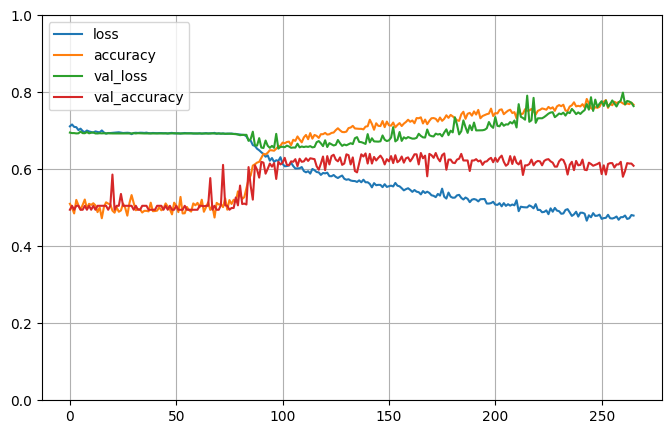


Testing # 1 1
2023-04-29 17:17:45.445443
PREDICT
Test 1:0 433:442 49.49%
Predict 1:0 460:415 52.57%
Test sizes (875, 1025) (875,)
Distrib of scores: 0.50755084 mean 0.24819407 std
Range of scores: 0.0064956755 to 0.94764537
Score threshold 0.5
Confusion matrix
 [[272 170]
 [143 290]]
Normalized matrix
 [[0.31085714 0.19428571]
 [0.16342857 0.33142857]]
Extreme scores correct, pos:neg 196 164
Extreme scores incorrect pos:neg 102 83


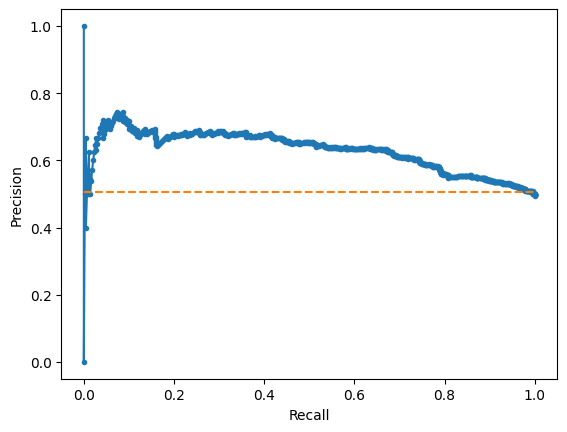

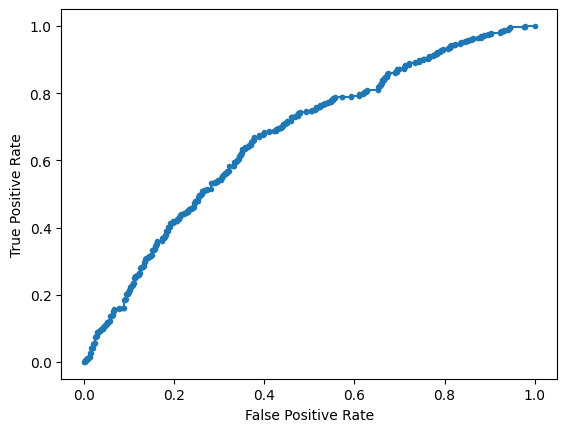

Accuracy: 64.23% Precision: 63.04% Recall: 66.97%
F1: 64.95% MCC: 0.2855
AUPRC: 62.93% AUROC: 66.89%
 accuracy [64.22857142857143]
 precision [63.04347826086957]
 recall [66.97459584295612]
 F1 [64.94960806270996]
 MCC [0.28549329087717745]
 AUPRC [62.92930612114574]
 AUROC [66.88524761476808]

Training # 1 2
2023-04-29 17:17:46.459060
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.2.validation_genes.txt
Discriminator ZERO -1
Train 1:0 1048:1016 50.78%
Computed class weights: {0: 1.015748031496063, 1: 0.9847328244274809}
Valid 1:0 454:421 51.89%
FIT


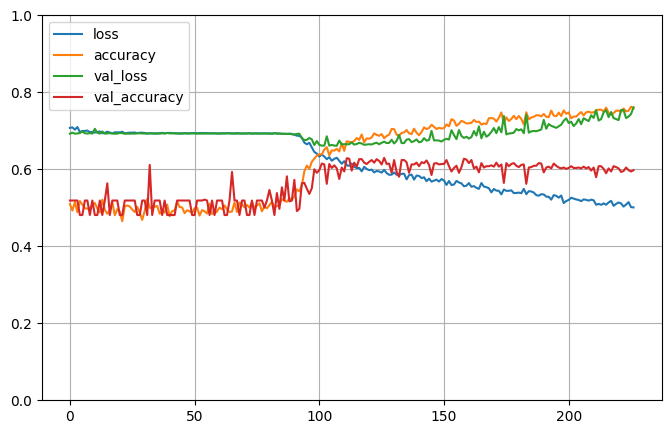


Testing # 1 2
2023-04-29 17:19:22.253644
PREDICT
Test 1:0 454:421 51.89%
Predict 1:0 602:273 68.80%
Test sizes (875, 1025) (875,)
Distrib of scores: 0.5811241 mean 0.18152139 std
Range of scores: 0.047241785 to 0.9169765
Score threshold 0.5
Confusion matrix
 [[185 236]
 [ 88 366]]
Normalized matrix
 [[0.21142857 0.26971429]
 [0.10057143 0.41828571]]
Extreme scores correct, pos:neg 221 82
Extreme scores incorrect pos:neg 134 30


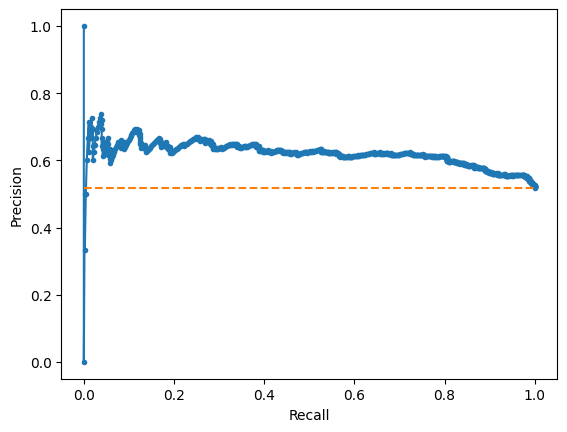

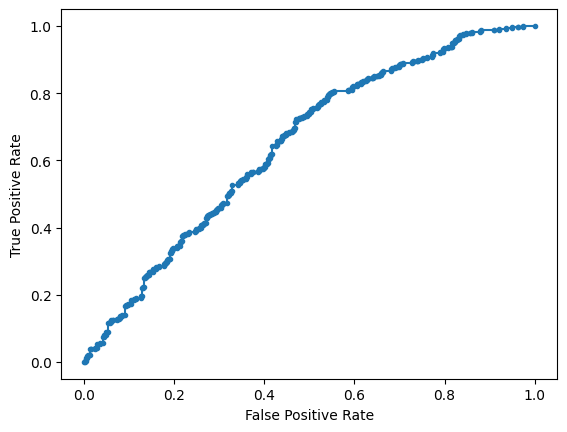

Accuracy: 62.97% Precision: 60.80% Recall: 80.62%
F1: 69.32% MCC: 0.2649
AUPRC: 62.00% AUROC: 64.56%
 accuracy [62.97142857142857]
 precision [60.797342192691026]
 recall [80.61674008810573]
 F1 [69.31818181818181]
 MCC [0.26485796971181125]
 AUPRC [61.99515055768284]
 AUROC [64.56360459154311]

Training # 1 3
2023-04-29 17:19:22.965852
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.3.validation_genes.txt
Discriminator ZERO -1
Train 1:0 1070:1030 50.95%
Computed class weights: {0: 1.0194174757281553, 1: 0.9813084112149533}
Valid 1:0 433:441 49.54%
FIT


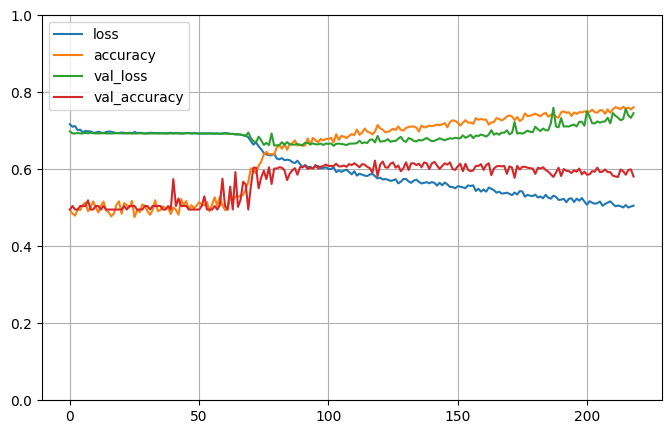


Testing # 1 3
2023-04-29 17:21:03.298117
PREDICT
Test 1:0 433:441 49.54%
Predict 1:0 521:353 59.61%
Test sizes (874, 1025) (874,)
Distrib of scores: 0.5344926 mean 0.19557898 std
Range of scores: 0.029203206 to 0.9040904
Score threshold 0.5
Confusion matrix
 [[232 209]
 [121 312]]
Normalized matrix
 [[0.26544622 0.23913043]
 [0.13844394 0.35697941]]
Extreme scores correct, pos:neg 173 118
Extreme scores incorrect pos:neg 110 48


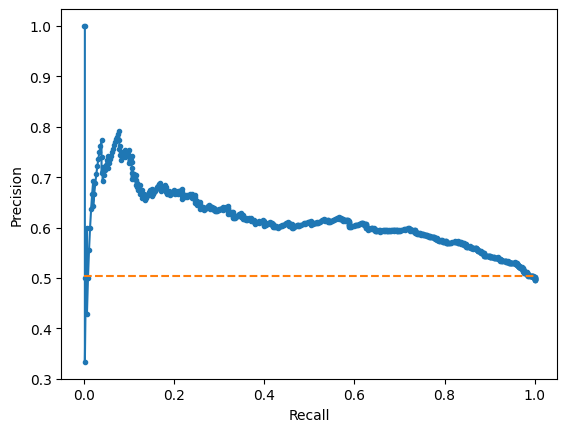

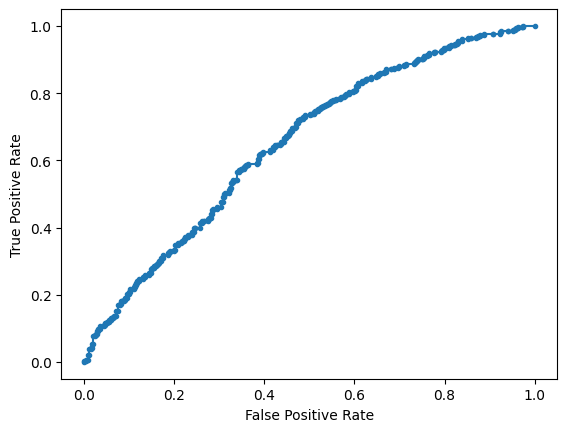

Accuracy: 62.24% Precision: 59.88% Recall: 72.06%
F1: 65.41% MCC: 0.2513
AUPRC: 61.55% AUROC: 64.94%
 accuracy [62.24256292906178]
 precision [59.88483685220729]
 recall [72.05542725173211]
 F1 [65.40880503144653]
 MCC [0.25130743874628025]
 AUPRC [61.54841063080608]
 AUROC [64.94372960885664]

Training # 1 4
2023-04-29 17:21:04.308304
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.4.validation_genes.txt
Discriminator ZERO -1
Train 1:0 1064:1041 50.55%
Computed class weights: {0: 1.01104707012488, 1: 0.9891917293233082}
Valid 1:0 465:409 53.20%
FIT


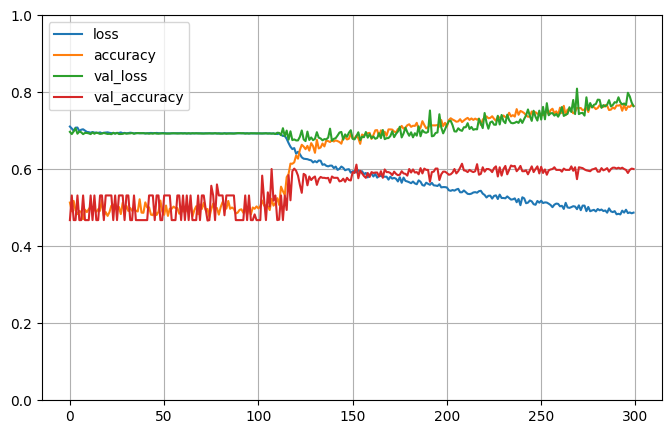


Testing # 1 4
2023-04-29 17:23:28.265140
PREDICT
Test 1:0 465:409 53.20%
Predict 1:0 490:384 56.06%
Test sizes (874, 1025) (874,)
Distrib of scores: 0.52666295 mean 0.27825508 std
Range of scores: 0.0036440957 to 0.983276
Score threshold 0.5
Confusion matrix
 [[222 187]
 [162 303]]
Normalized matrix
 [[0.25400458 0.21395881]
 [0.18535469 0.34668192]]
Extreme scores correct, pos:neg 221 167
Extreme scores incorrect pos:neg 125 106


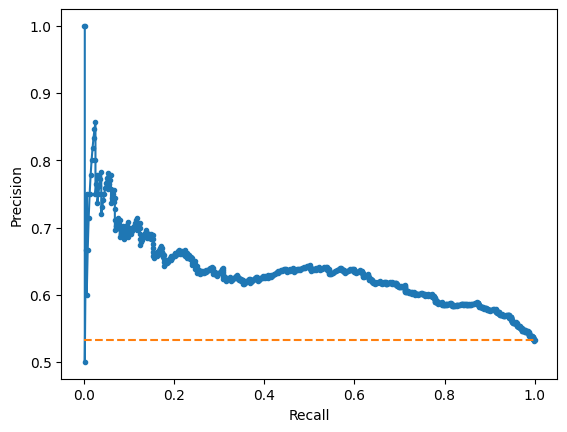

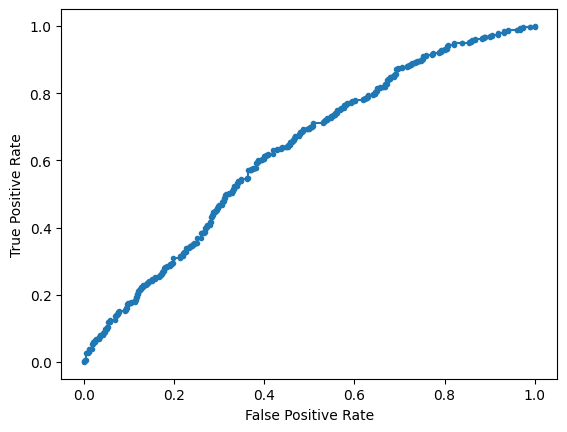

Accuracy: 60.07% Precision: 61.84% Recall: 65.16%
F1: 63.46% MCC: 0.1954
AUPRC: 63.26% AUROC: 62.89%
 accuracy [60.068649885583525]
 precision [61.836734693877546]
 recall [65.16129032258064]
 F1 [63.455497382198956]
 MCC [0.19544346865222106]
 AUPRC [63.25649813031834]
 AUROC [62.886137182217304]

Training # 1 5
2023-04-29 17:23:28.920330
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.5.validation_genes.txt
Discriminator ZERO -1
Train 1:0 1040:1044 49.90%
Computed class weights: {0: 0.9980842911877394, 1: 1.001923076923077}
Valid 1:0 458:416 52.40%
FIT


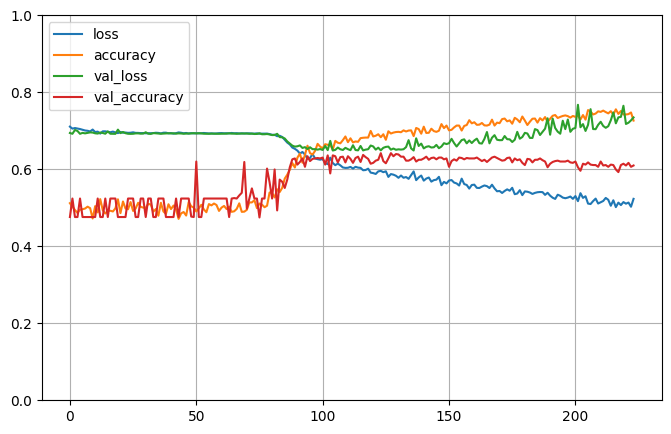


Testing # 1 5
2023-04-29 17:25:52.396905
PREDICT
Test 1:0 458:416 52.40%
Predict 1:0 491:383 56.18%
Test sizes (874, 1025) (874,)
Distrib of scores: 0.5295467 mean 0.1900806 std
Range of scores: 0.055650204 to 0.90876645
Score threshold 0.5
Confusion matrix
 [[243 173]
 [140 318]]
Normalized matrix
 [[0.27803204 0.1979405 ]
 [0.16018307 0.36384439]]
Extreme scores correct, pos:neg 181 122
Extreme scores incorrect pos:neg 77 50


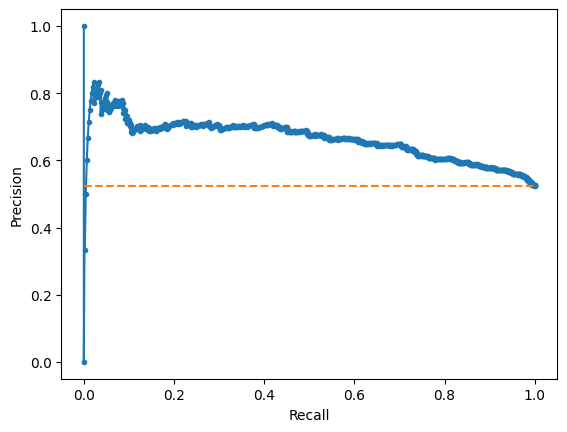

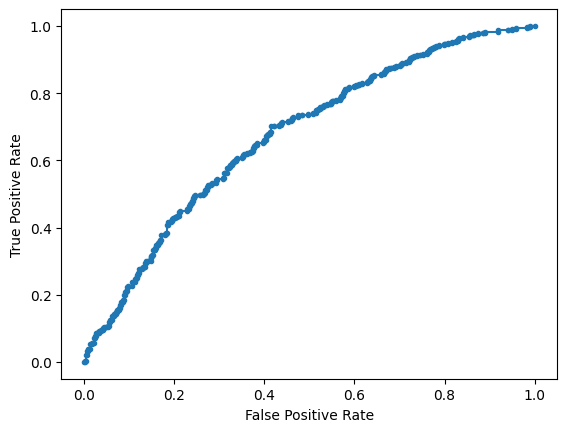

Accuracy: 64.19% Precision: 64.77% Recall: 69.43%
F1: 67.02% MCC: 0.2803
AUPRC: 66.27% AUROC: 67.42%
 accuracy [64.18764302059496]
 precision [64.76578411405295]
 recall [69.43231441048034]
 F1 [67.01791359325607]
 MCC [0.2802841864530071]
 AUPRC [66.27206153684372]
 AUROC [67.42158632851863]

Training # 2 1
2023-04-29 17:25:53.352330
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.1.validation_genes.txt
Discriminator ZERO -1
Train 1:0 1060:1030 50.72%
Computed class weights: {0: 1.0145631067961165, 1: 0.9858490566037735}
Valid 1:0 436:439 49.83%
FIT


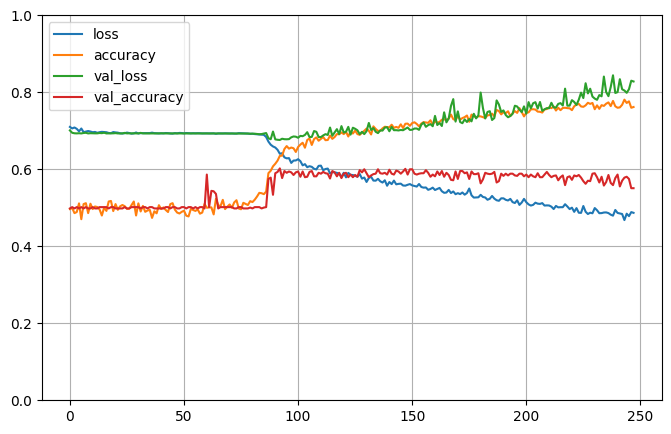


Testing # 2 1
2023-04-29 17:28:17.406277
PREDICT
Test 1:0 436:439 49.83%
Predict 1:0 501:374 57.26%
Test sizes (875, 1025) (875,)
Distrib of scores: 0.5271499 mean 0.21956256 std
Range of scores: 0.0051685204 to 0.9273833
Score threshold 0.5
Confusion matrix
 [[232 207]
 [142 294]]
Normalized matrix
 [[0.26514286 0.23657143]
 [0.16228571 0.336     ]]
Extreme scores correct, pos:neg 177 141
Extreme scores incorrect pos:neg 117 65


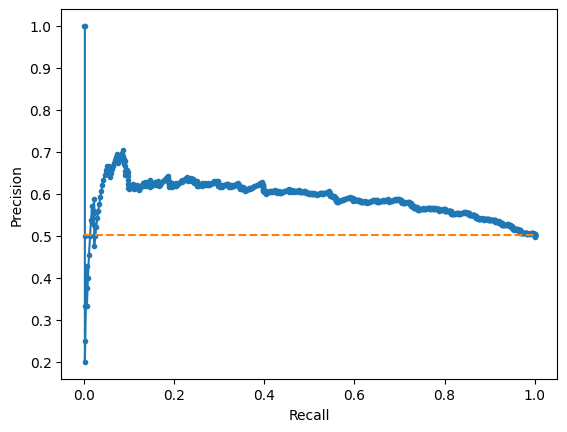

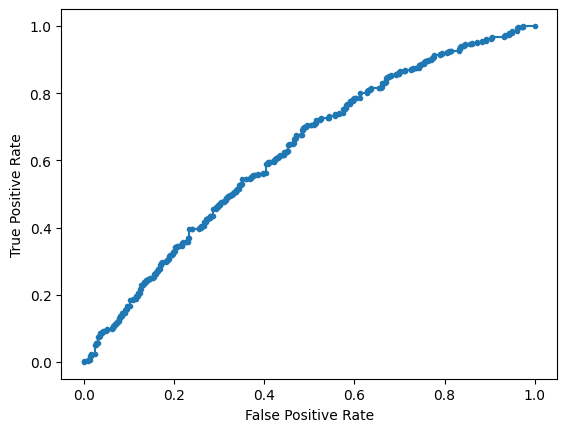

Accuracy: 60.11% Precision: 58.68% Recall: 67.43%
F1: 62.75% MCC: 0.2050
AUPRC: 59.01% AUROC: 62.65%
 accuracy [60.11428571428571]
 precision [58.68263473053892]
 recall [67.43119266055045]
 F1 [62.75346851654214]
 MCC [0.2049548655383773]
 AUPRC [59.009096223012925]
 AUROC [62.64863848195441]

Training # 2 2
2023-04-29 17:28:18.054175
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.2.validation_genes.txt
Discriminator ZERO -1
Train 1:0 1043:1028 50.36%
Computed class weights: {0: 1.007295719844358, 1: 0.9928092042186002}
Valid 1:0 449:426 51.31%
FIT


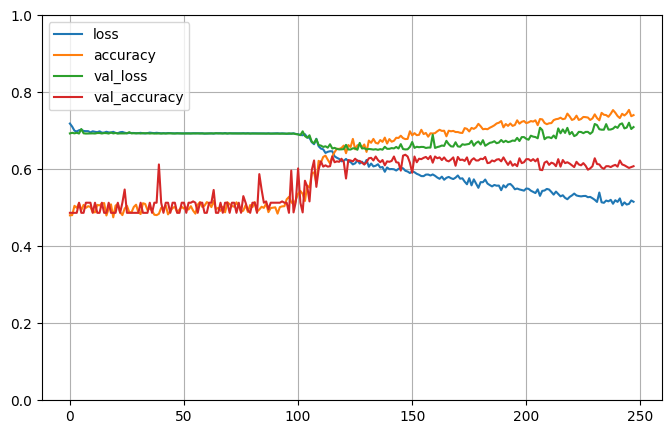


Testing # 2 2
2023-04-29 17:30:41.652226
PREDICT
Test 1:0 449:426 51.31%
Predict 1:0 474:401 54.17%
Test sizes (875, 1025) (875,)
Distrib of scores: 0.5177548 mean 0.18988273 std
Range of scores: 0.045330692 to 0.9141595
Score threshold 0.5
Confusion matrix
 [[255 171]
 [146 303]]
Normalized matrix
 [[0.29142857 0.19542857]
 [0.16685714 0.34628571]]
Extreme scores correct, pos:neg 160 136
Extreme scores incorrect pos:neg 82 48


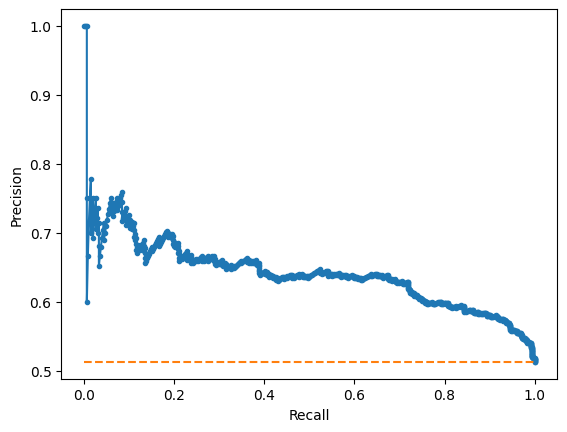

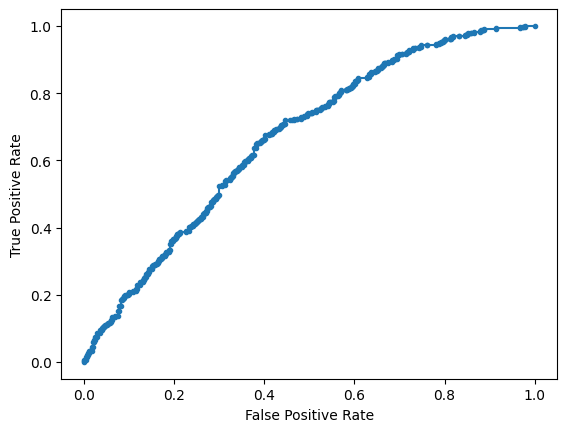

Accuracy: 63.77% Precision: 63.92% Recall: 67.48%
F1: 65.66% MCC: 0.2743
AUPRC: 64.15% AUROC: 66.61%
 accuracy [63.771428571428565]
 precision [63.92405063291139]
 recall [67.48329621380846]
 F1 [65.6554712892741]
 MCC [0.2742862631101206]
 AUPRC [64.14864885777392]
 AUROC [66.61229440488515]

Training # 2 3
2023-04-29 17:30:42.628806
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.3.validation_genes.txt
Discriminator ZERO -1
Train 1:0 1050:1041 50.22%
Computed class weights: {0: 1.0043227665706052, 1: 0.9957142857142857}
Valid 1:0 472:402 54.00%
FIT


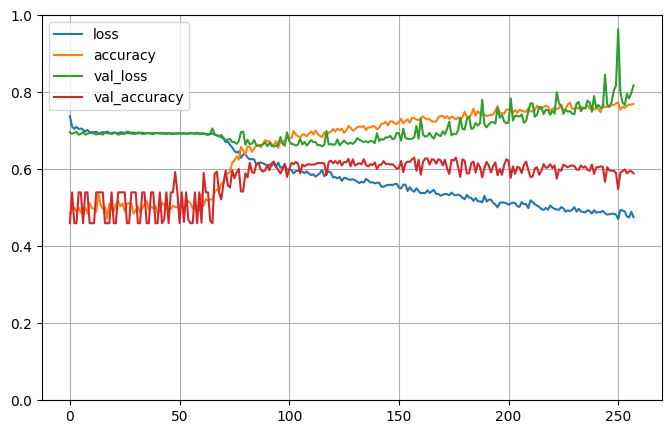


Testing # 2 3
2023-04-29 17:32:37.924769
PREDICT
Test 1:0 472:402 54.00%
Predict 1:0 643:231 73.57%
Test sizes (874, 1025) (874,)
Distrib of scores: 0.6096149 mean 0.21083337 std
Range of scores: 0.011815453 to 0.9043892
Score threshold 0.5
Confusion matrix
 [[155 247]
 [ 76 396]]
Normalized matrix
 [[0.17734554 0.2826087 ]
 [0.08695652 0.45308924]]
Extreme scores correct, pos:neg 292 91
Extreme scores incorrect pos:neg 163 34


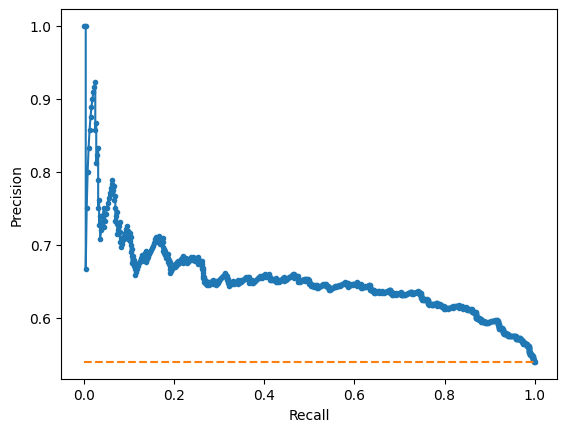

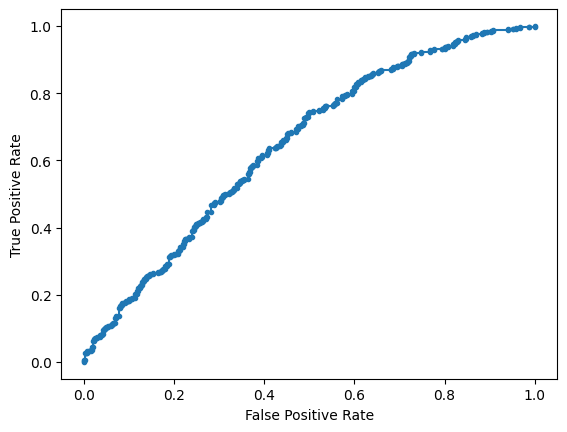

Accuracy: 63.04% Precision: 61.59% Recall: 83.90%
F1: 71.03% MCC: 0.2538
AUPRC: 65.32% AUROC: 64.65%
 accuracy [63.04347826086957]
 precision [61.58631415241057]
 recall [83.89830508474576]
 F1 [71.03139013452913]
 MCC [0.2538023545829537]
 AUPRC [65.31978333924552]
 AUROC [64.65237372459734]

Training # 2 4
2023-04-29 17:32:38.853110
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.4.validation_genes.txt
Discriminator ZERO -1
Train 1:0 1080:1019 51.45%
Computed class weights: {0: 1.0299313052011776, 1: 0.9717592592592592}
Valid 1:0 427:447 48.86%
FIT


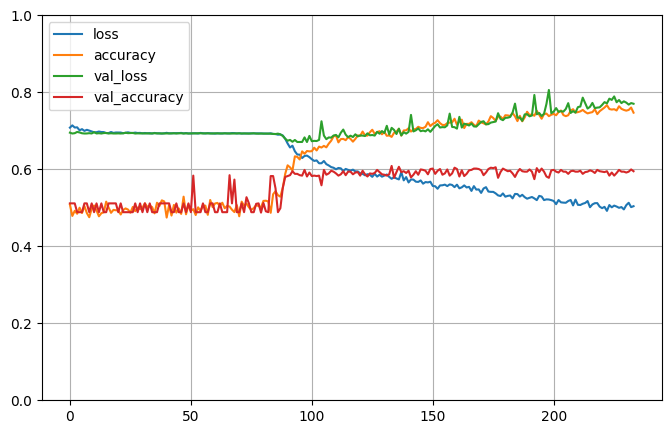


Testing # 2 4
2023-04-29 17:34:21.359118
PREDICT
Test 1:0 427:447 48.86%
Predict 1:0 581:293 66.48%
Test sizes (874, 1025) (874,)
Distrib of scores: 0.58006006 mean 0.20485504 std
Range of scores: 0.039567515 to 0.9366546
Score threshold 0.5
Confusion matrix
 [[199 248]
 [ 94 333]]
Normalized matrix
 [[0.22768879 0.28375286]
 [0.10755149 0.38100686]]
Extreme scores correct, pos:neg 210 94
Extreme scores incorrect pos:neg 147 39


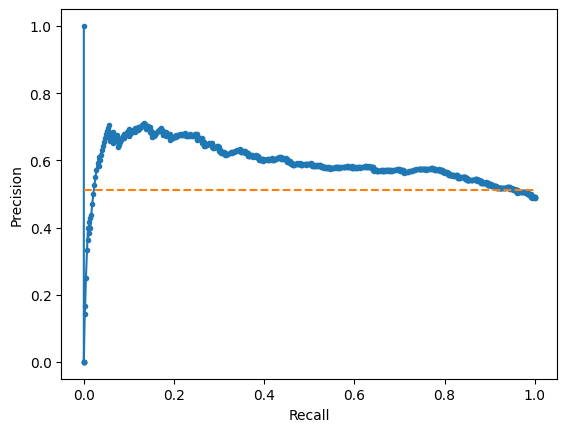

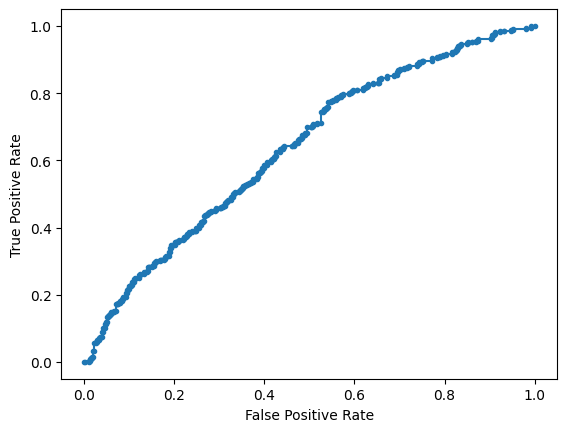

Accuracy: 60.87% Precision: 57.31% Recall: 77.99%
F1: 66.07% MCC: 0.2383
AUPRC: 59.32% AUROC: 63.64%
 accuracy [60.86956521739131]
 precision [57.31497418244407]
 recall [77.98594847775175]
 F1 [66.07142857142857]
 MCC [0.23830005792931]
 AUPRC [59.31568319613216]
 AUROC [63.63998344414231]

Training # 2 5
2023-04-29 17:34:22.049939
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.5.validation_genes.txt
Discriminator ZERO -1
Train 1:0 1051:1026 50.60%
Computed class weights: {0: 1.0121832358674463, 1: 0.9881065651760228}
Valid 1:0 459:415 52.52%
FIT


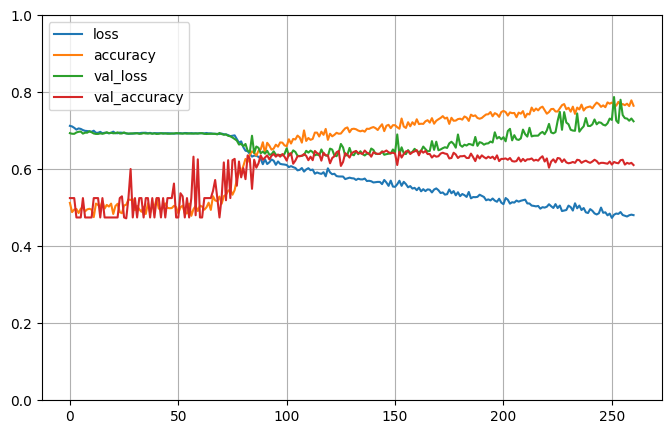


Testing # 2 5
2023-04-29 17:36:45.555421
PREDICT
Test 1:0 459:415 52.52%
Predict 1:0 473:401 54.12%
Test sizes (874, 1025) (874,)
Distrib of scores: 0.51008284 mean 0.22544697 std
Range of scores: 0.0064172638 to 0.90629524
Score threshold 0.5
Confusion matrix
 [[255 160]
 [146 313]]
Normalized matrix
 [[0.29176201 0.18306636]
 [0.16704805 0.35812357]]
Extreme scores correct, pos:neg 200 168
Extreme scores incorrect pos:neg 80 62


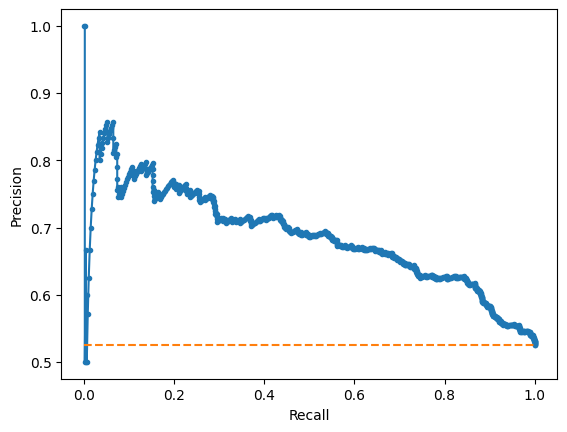

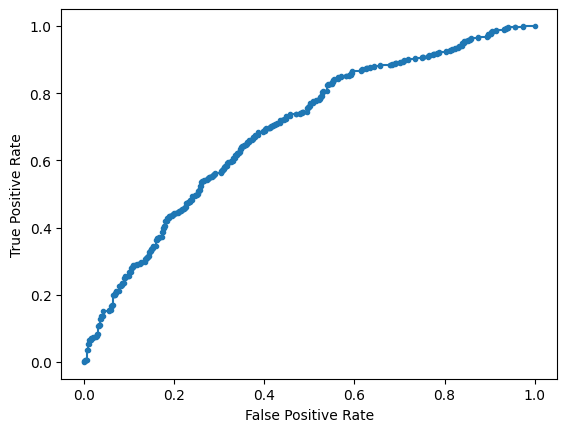

Accuracy: 64.99% Precision: 66.17% Recall: 68.19%
F1: 67.17% MCC: 0.2970
AUPRC: 68.57% AUROC: 69.02%
 accuracy [64.98855835240275]
 precision [66.17336152219873]
 recall [68.1917211328976]
 F1 [67.16738197424891]
 MCC [0.29700876363380113]
 AUPRC [68.57174124634464]
 AUROC [69.02380764889624]
2023-04-29 17:36:46.224910


In [7]:
print(datetime.now())

accuracy=[]
precision=[]
recall=[]
f1=[]
mcc=[]
auprc=[]
auroc=[]

loader = DataLoader(K,ALPHABET)
filepath = DATA_DIR+RCI_FILE_TRAIN
print("Load RCI from",filepath)
gene_to_rci = loader.load_gene_rci_values(filepath,EXCLUSIONS)
print('Num RCI:', len(gene_to_rci.keys()))
filepath = DATA_DIR+SEQ_FILE_TRAIN
print('Load sequence from',filepath)
allids,allseq = loader.load_spectra(filepath)  # for MLP (load_sequence() for CNN)
print('Loaded',len(allseq),'sequences.')
test_gene_to_rci = None
test_allids = None
test_allseq = None
if SEQ_FILE_TEST is not None:
    # Train on the entire train set (no cross-validation).
    # Evaluate with the test files.
    test_loader = DataLoader(K,ALPHABET)
    filepath = DATA_DIR+RCI_FILE_TEST
    print("Load RCI from",filepath)
    test_gene_to_rci = test_loader.load_gene_rci_values(filepath,EXCLUSIONS)
    print('Num RCI:', len(test_gene_to_rci.keys()))
    filepath = DATA_DIR+SEQ_FILE_TEST
    print('Load sequence from',filepath)
    test_allids,test_allseq = test_loader.load_spectra(filepath)
    print('Loaded',len(test_allseq),'sequences.')

for repeat in range(REPEATS):
    for fold in range(FOLDS):
        show_r = repeat+1  # display one-based counting
        show_f = fold+1    # display one-based counting

        print()
        print("Training #",show_r,show_f)
        print(datetime.now())
        builder = ModelBuilder(ALPHABET)
        cvdo = CrossValidator(EPOCHS,RCI_THRESHOLD_VALUE)
        cvdo.set_model_builder(builder)
        cvdo.set_threshold_mechanism(RCI_THRESHOLD_MECHANISM)
        
        if SEQ_FILE_TEST is None:
            # Train on 80% and evaluate on 20%.
            separator = Separator()
            separator.set_middle(FILTER_TEST,FILTER_TAILS_TEST,FILTER_MIDDLE_TEST,\
                                 FILTER_TRAIN,FILTER_TAILS_TRAIN,FILTER_MIDDLE_TRAIN,\
                                 MIDDLE_LOW,MIDDLE_HIGH)
            separator.load(DATA_DIR,show_r,show_f)
            separator.process(allids,allseq,gene_to_rci)
            train_allids,test_allids = separator.get_ids()
            train_allseq,test_allseq = separator.get_seq()
            train_gene_to_rci,test_gene_to_rci = separator.get_rci()
            cvdo.train_new_model(
                train_allids,train_allseq,train_gene_to_rci,
                test_allids,test_allseq,test_gene_to_rci)
            if SAVE_MODEL_FILENAME is not None:
                filename1 = f"{SAVE_MODEL_FILENAME}.{show_r}.{show_f}.model"
                filename2 = f"{SAVE_DESCRIM_FILENAME}.{show_r}.{show_f}.pickle"
                model,discrim = cvdo.get_models()
                save_model(model,discrim,filename1,filename2)
        else:
            # Train on the entire train set (no cross-validation).
            # Evaluate with the test files.
            train_allids = allids
            train_allseq = allseq
            train_gene_to_rci = gene_to_rci
            BREAK = True
            if LOAD_MODEL_FILENAME is not None:
                filename1 = LOAD_MODEL_FILENAME
                filename2 = LOAD_DESCRIM_FILENAME
                model, descrim = load_model(filename1, filename2)
                cvdo.set_models(model, descrim)
            else:
                cvdo.train_new_model(
                    train_allids,train_allseq,train_gene_to_rci,
                    None,None,None)

        print()
        print("Testing #",show_r,show_f)
        print(datetime.now())
        cvdo.reset_statistics()
        cvdo.test_without_training(
            test_allids,test_allseq,test_gene_to_rci)
        cv_accuracy,cv_precision,cv_recall,cv_f1,cv_mcc,cv_auprc,cv_auroc=\
            cvdo.get_statistics()

        print(" accuracy" ,  cv_accuracy)
        print(" precision" , cv_precision)
        print(" recall" ,    cv_recall)
        print(" F1" ,        cv_f1)
        print(" MCC" ,       cv_mcc)
        print(" AUPRC" ,     cv_auprc)
        print(" AUROC" ,     cv_auroc)

        accuracy.append(cv_accuracy)
        precision.append(cv_precision)
        recall.append(cv_recall)
        f1.append(cv_f1)
        mcc.append(cv_mcc)
        auprc.append(cv_auprc)
        auroc.append(cv_auroc)
        if BREAK: break
    if BREAK: break
print(datetime.now())

In [8]:
def STD (values):
    # ddof=1 reduces bias when extrapolating from sample to population
    return np.std(values,ddof=1)

print(" accuracy mean %.2f%% std %.2f" %  (np.mean(accuracy),  STD(accuracy)))
print(" precision mean %.2f%% std %.2f" % (np.mean(precision), STD(precision)))
print(" recall mean %.2f%% std %.2f" %    (np.mean(recall),    STD(recall)))
print(" F1 mean %.2f%% std %.2f" %        (np.mean(f1),        STD(f1)))
print(" MCC mean %.4f std %.4f" %       (np.mean(mcc),       STD(mcc)))
print(" AUPRC mean %.2f%% std %.2f" %     (np.mean(auprc),     STD(auprc)))
print(" AUROC mean %.2f%% std %.2f" %     (np.mean(auroc),     STD(auroc)))

print(" accuracy"  , accuracy)
print(" precision" , precision)
print(" recall"    , recall)
print(" F1"        , f1)
print(" MCC"       , mcc)
print(" AUPRC"     , auprc)
print(" AUROC"     , auroc)



 accuracy mean 62.65% std 1.77
 precision mean 61.80% std 2.76
 recall mean 71.92% std 6.55
 F1 mean 66.28% std 2.51
 MCC mean 0.2546 std 0.0336
 AUPRC mean 63.24% std 2.99
 AUROC mean 65.33% std 2.09
 accuracy [[64.22857142857143], [62.97142857142857], [62.24256292906178], [60.068649885583525], [64.18764302059496], [60.11428571428571], [63.771428571428565], [63.04347826086957], [60.86956521739131], [64.98855835240275]]
 precision [[63.04347826086957], [60.797342192691026], [59.88483685220729], [61.836734693877546], [64.76578411405295], [58.68263473053892], [63.92405063291139], [61.58631415241057], [57.31497418244407], [66.17336152219873]]
 recall [[66.97459584295612], [80.61674008810573], [72.05542725173211], [65.16129032258064], [69.43231441048034], [67.43119266055045], [67.48329621380846], [83.89830508474576], [77.98594847775175], [68.1917211328976]]
 F1 [[64.94960806270996], [69.31818181818181], [65.40880503144653], [63.455497382198956], [67.01791359325607], [62.75346851654214], [6